In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/uybor_scrapping.csv')
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [5]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [6]:
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [7]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [8]:
df = df.replace(
    {
        'Юнусабадский':'Yunusobod',
        'Яккасарайский': 'Yakkasaroy',
        'Чиланзарский': 'Chilonzor',
        'Учтепинский': 'Uchtepa',
        'Мирзо-Улугбекский': 'Mirzo Ulug\'bek',
        'Яшнободский': 'Yashnobod',
        'Мирабадский': 'Mirobod',
        'Шайхантахурский': 'Shayhontohur',
        'Олмазорский': 'Olmazor',
        'Сергелийский': 'Sergeli',
        'Янгихаётский': 'Yangihayot',
        'Бектемирский': 'Bektemir'
    }
)

In [9]:
df['district'].unique()

array(['Yunusobod', 'Yakkasaroy', 'Chilonzor', 'Uchtepa',
       "Mirzo Ulug'bek", 'Yashnobod', 'Mirobod', 'Shayhontohur',
       'Olmazor', 'Sergeli', 'Yangihayot', 'Bektemir'], dtype=object)

In [10]:
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


### Correlaion

In [17]:
df_corr = df.drop(['location', 'district'], axis=1).corr()

<Axes: >

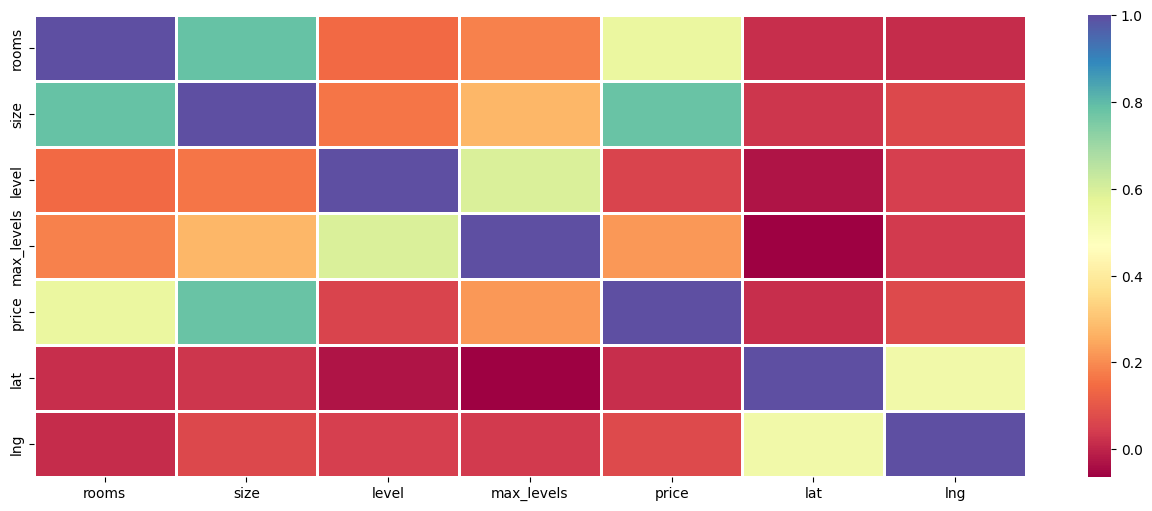

In [18]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=df_corr, linewidth=2, cmap='Spectral')

C:\Users\admin\AppData\Local\Temp\ipykernel_3220\1324352304.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1800x1400 with 0 Axes>

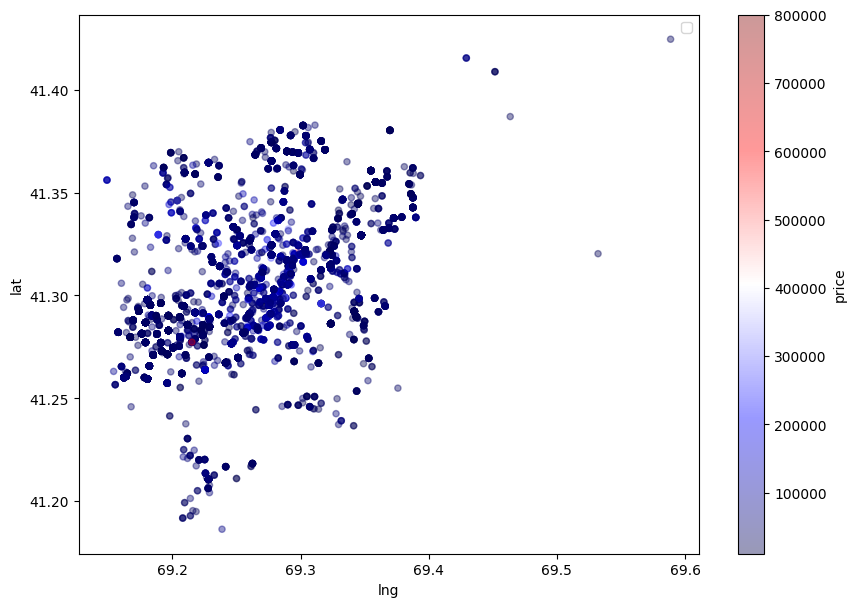

In [19]:
plt.figure(figsize=(18, 14))
df.plot(kind="scatter", x="lng", y="lat",
        c="price", cmap=plt.get_cmap("seismic"),
        colorbar=True, alpha=0.4, figsize=(10, 7),
       )

plt.legend()
plt.show()

<Axes: xlabel='price', ylabel='Count'>

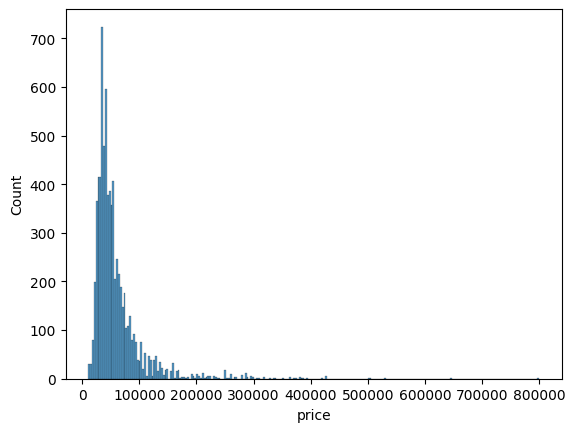

In [20]:
sns.histplot(data=df, x='price')

#### narxi 200000 ortiq uylar kamligi uchun, tashlab yuboramiz

In [21]:
df = df[df['price']<200000]

<Axes: xlabel='price', ylabel='Count'>

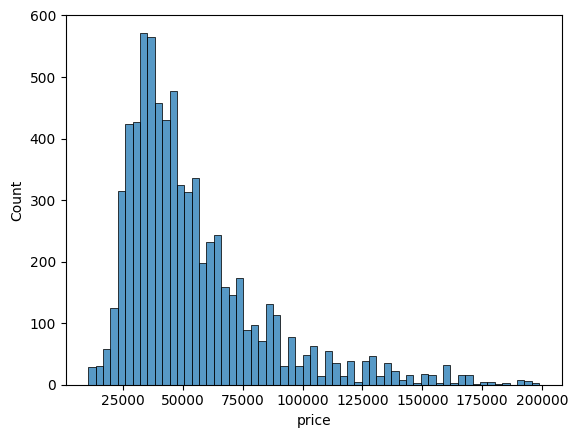

In [22]:
sns.histplot(data=df, x='price')

In [23]:
print(f"minimal uy narxi: {df['price'].min()} $")
print(f"maximal uy narxi: {df['price'].max()} $")
print(f"O\'rtacha uy narxi: {df['price'].mean()} $")

minimal uy narxi: 10500 $
maximal uy narxi: 198750 $
O'rtacha uy narxi: 54072.469761675166 $


<Axes: xlabel='size', ylabel='price'>

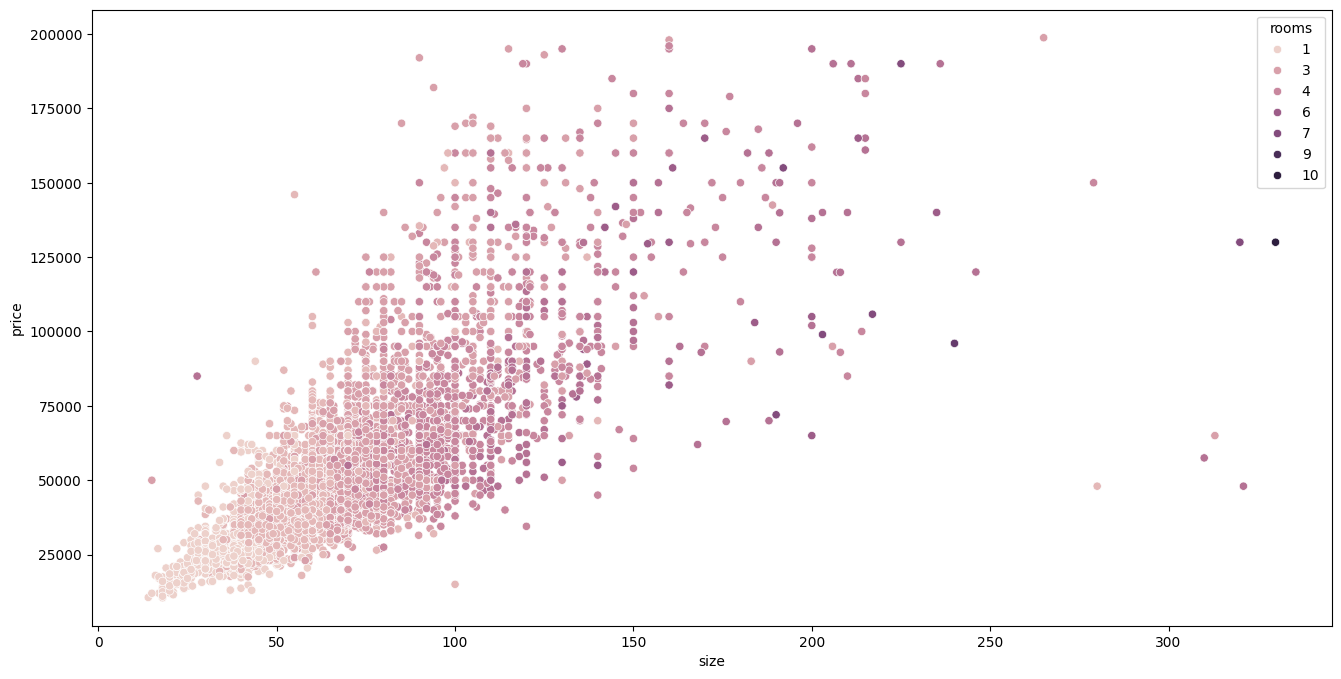

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='size', y='price', hue='rooms')

In [25]:
df['district'].shape

(7259,)

In [26]:
df[df['size']<150].shape

(7120, 9)

### O'lchami 150 dan katta uylar ham deyarli yo'q ekan, bu malumotlarni tashlab yuboramiz

In [27]:
df = df[df['size']<150]

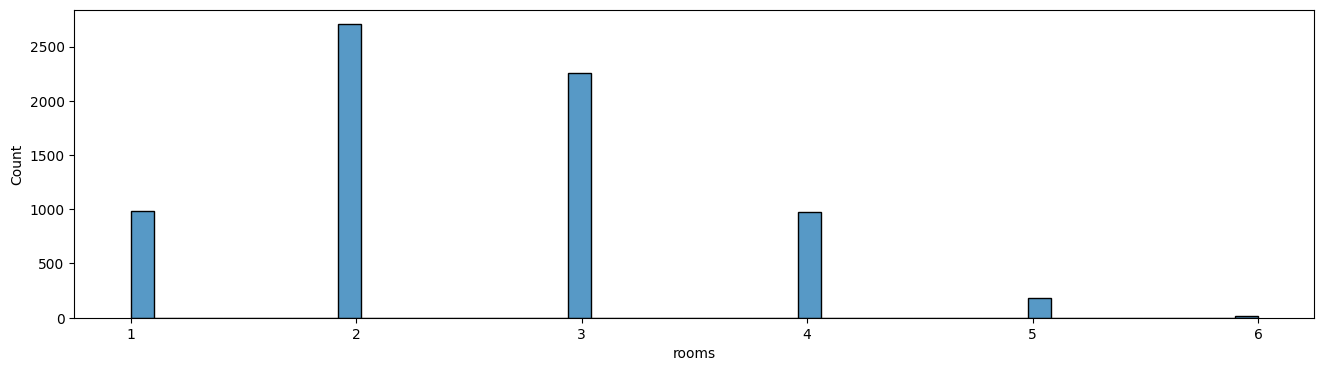

In [28]:
plt.figure(figsize=(16, 4))
sns.histplot(data=df, x='rooms')
plt.show()

In [29]:
df.shape

(7120, 9)

In [30]:
df[df['rooms']<6].shape

(7106, 9)

### 5 xonagacha bo'lgan uylar soni ko'p ekan, 6 va undan ko'plarini hisobga olmaymiz

In [31]:
df = df[df['rooms']<6]

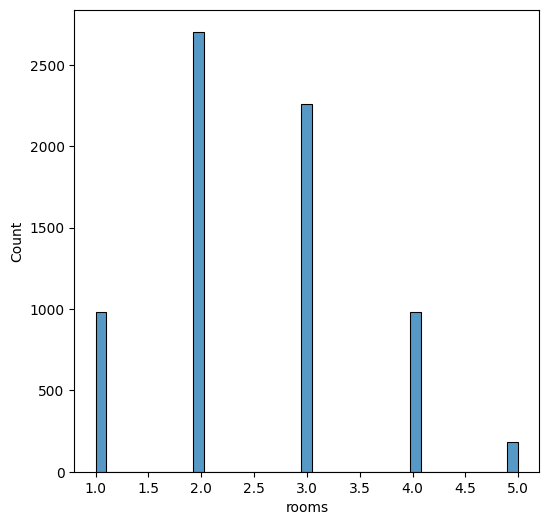

In [32]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='rooms')
plt.show()

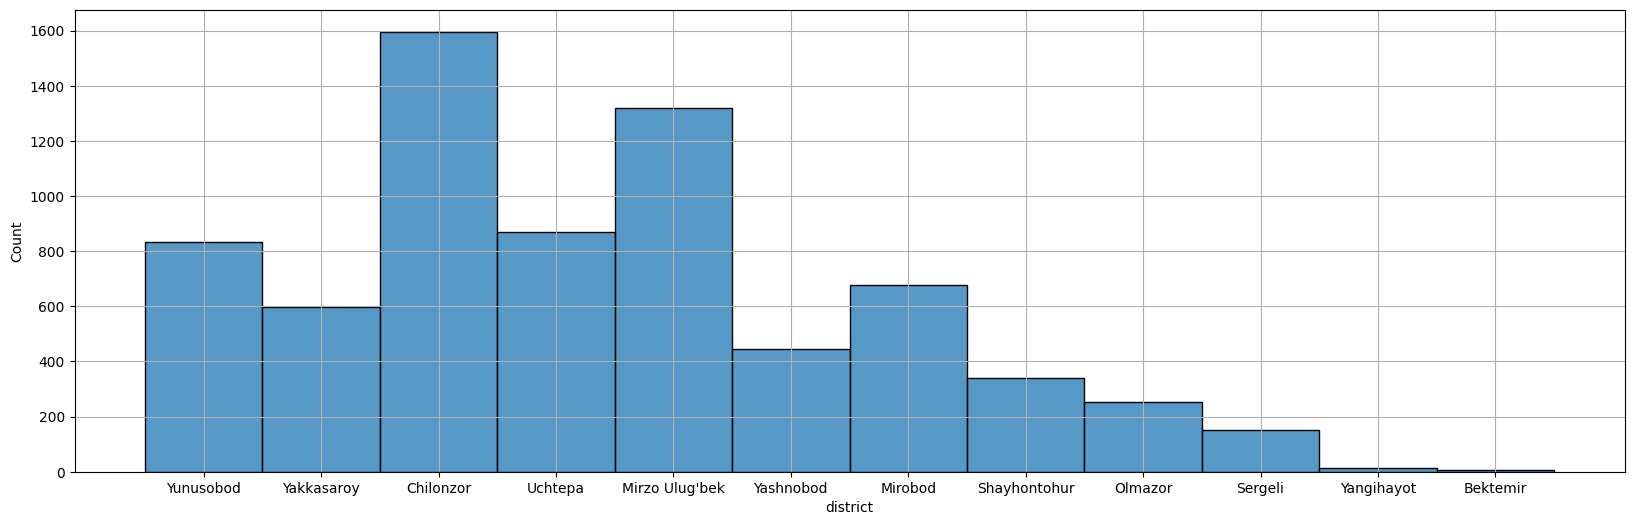

In [33]:
plt.figure(figsize=(20,6))
plt.grid()
sns.histplot(data=df,x='district')
plt.show()

In [34]:
df['district'].value_counts()

district
Chilonzor         1596
Mirzo Ulug'bek    1318
Uchtepa            868
Yunusobod          832
Mirobod            678
Yakkasaroy         599
Yashnobod          446
Shayhontohur       341
Olmazor            253
Sergeli            153
Yangihayot          14
Bektemir             8
Name: count, dtype: int64

<Axes: xlabel='district', ylabel='price'>

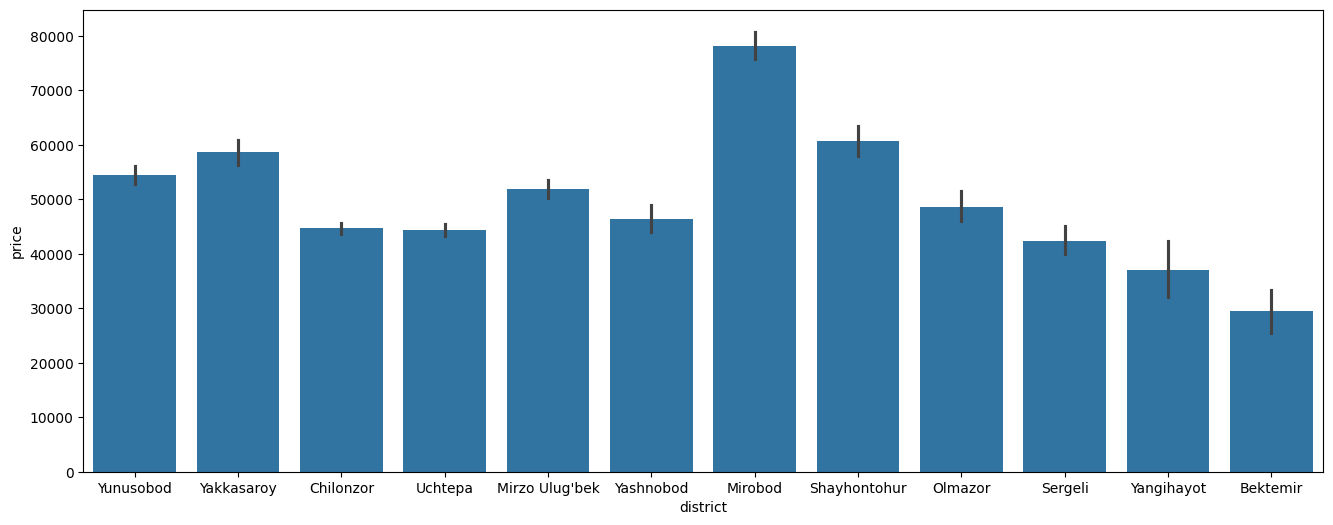

In [35]:
plt.figure(figsize=(16,6))
sns.barplot(y=df['price'],x=df['district'])

In [37]:
df1=df.groupby('district').price.mean()
print(f"uylarni o'rtacha narxlar\n"
      f"{df1}")

uylarni o'rtacha narxlar
district
Bektemir          29462.500000
Chilonzor         44669.085213
Mirobod           78180.647493
Mirzo Ulug'bek    51967.875569
Olmazor           48668.079051
Sergeli           42428.339869
Shayhontohur      60618.882698
Uchtepa           44421.077189
Yakkasaroy        58606.045075
Yangihayot        37000.000000
Yashnobod         46469.378924
Yunusobod         54423.167067
Name: price, dtype: float64


In [38]:
df1=df.groupby('rooms').price.mean()
df1

rooms
1    28350.139511
2    41919.677885
3    63337.623894
4    75787.912155
5    78227.569061
Name: price, dtype: float64

In [39]:
df2=pd.DataFrame(df,columns=['district','rooms','price'])
df2.head()

,district,rooms,price
0,Yunusobod,3,52000
1,Yakkasaroy,2,56000
2,Chilonzor,2,37000
3,Chilonzor,3,49500
4,Chilonzor,3,55000


In [40]:
df2=df2.set_index('district')
df2

,rooms,price
district,,
Yunusobod,3,52000
Yakkasaroy,2,56000
Chilonzor,2,37000
Chilonzor,3,49500
Chilonzor,3,55000
...,...,...
Yashnobod,1,24500
Yashnobod,2,32000
Shayhontohur,2,40000


### |Har bir tumandagi uylarni xonalar bo'yicha narxlari quyida ko'rsatilgan

In [43]:
df3=pd.pivot_table(df2,index=['district','rooms'])
df3

price
district       rooms               
Bektemir       1       19000.000000
               2       26100.000000
               3       30120.000000
               4       40000.000000
Chilonzor      1       26369.605590
               2       38010.270998
               3       56071.352201
               4       70120.221429
               5       86673.076923
Mirobod        1       44469.811321
               2       60440.597938
               3       84522.534296
               4      100331.000000
               5      102956.521739
Mirzo Ulug'bek 1       26577.075000
               2       40542.056995
               3       67367.599509
               4       79434.992806
               5       69921.212121
Olmazor        1       25522.222222
               2       37290.974026
               3       57877.252874
               4       66726.142857
               5       62272.727273
Sergeli        1       21361.954545
               2       33640.500000
               3       48053.553191
               4       54592.857143
               5       68699.300000
Shayhontohur   1       32523.935484
               2       47470.431818
               3       64082.673077
               4       85215.551724
               5       68250.000000
Uchtepa        1       26219.247312
               2       35724.554140
               3       48861.837037
               4       60577.216667
               5       73181.818182
Yakkasaroy     1       31327.262626
               2       49380.928030
               3       77151.714286
               4       87334.528571
               5       78938.461538
Yangihayot     2       30357.142857
               3       47300.000000
               4       34500.000000
Yashnobod      1       21457.376812
               2       40206.511628
               3       55957.546667
               4       70566.638298
               5       77375.000000
Yunusobod      1       34408.739583
               2       42787.129909
               3       64854.548117
               4       74313.205674
               5       73435.880000